# Multi Linear Regression Question 1

Prepare a prediction model for profit of 50_startups data. Do transformations for getting better predictions of profit and
make a table containing R^2 value for each prepared model.

R&D Spend -- Research and devolop spend in the past few years

Administration -- spend on administration in the past few years

Marketing Spend -- spend on Marketing in the past few years

State -- states from which data is collected

Profit  -- profit of each state in the past few years

### Steps :

1. Import new data set
    - understand the dataset, look into it. 
    - perform EDA. show profiling.
    - check data info and null values.
    - check for linearity and relationship between the variables and 'y'.
2. Correlation analysis
    - check corr()
    - check distribution of all variables.
    - check for any autocorrelations
3. Fitting a Multi Linear Regression Model
    - train the model => fit()
    - check model summary.
    - check Rsqr and AIC values. 
4. Trying out SLR models
    - trying out various slr models with each variables to determine individual contribution.
    - considering which all models for further testing and training
5. Calculating Variance Inflation factor (VIF)
    - to determine the VIF for each element
6. Residual Analysis
    - Test for normality of residuals (QQ-Plot)
    - Residual plot for homoscedasity 
    - Residuals vs Regressors
7. Model Deletion Diagnostics
    - Detecting Influences
    - Cook's distance
    - High Influence plots
    - Removal of influences

8. Build Final Model

9. Predict for new data


### Import new dataset

In [1]:
#load the libraries
import pandas as pd
import numpy as np
import pandas_profiling as pp
from sklearn.linear_model import LinearRegression
import seaborn as sns
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')

data = pd.read_csv("D:\\Education\\ExcelR Assignments\\5\\50_Startups.csv")
data.rename(columns={'R&D Spend':'rd_spend','Administration':'admin', 'Administration':'admin', 'Marketing Spend':'mkt_spend','State':'state','Profit':'profit'  }, inplace = True)
data.head()

,rd_spend,admin,mkt_spend,state,profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [2]:
data['state'] = data['state'].astype("object")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   rd_spend   50 non-null     float64
 1   admin      50 non-null     float64
 2   mkt_spend  50 non-null     float64
 3   state      50 non-null     object 
 4   profit     50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [3]:
data.describe() 
#the max value in mkt_spend seems to be an outliner. However, it's not very significant

,rd_spend,admin,mkt_spend,profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


<AxesSubplot:>

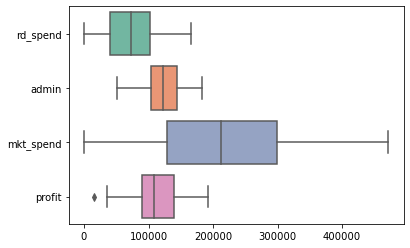

In [4]:
sns.boxplot(data=data, orient="h", palette="Set2")

### Correlation Analysis

In [5]:
data.corr() 
#r&d_spend has certain high correlations with profit. 
#There is some level of correlation between mkt_spend and r&d_spend which is not ideal.

,rd_spend,admin,mkt_spend,profit
rd_spend,1.000000,0.241955,0.724248,0.972900
admin,0.241955,1.000000,-0.032154,0.200717
mkt_spend,0.724248,-0.032154,1.000000,0.747766
profit,0.972900,0.200717,0.747766,1.000000


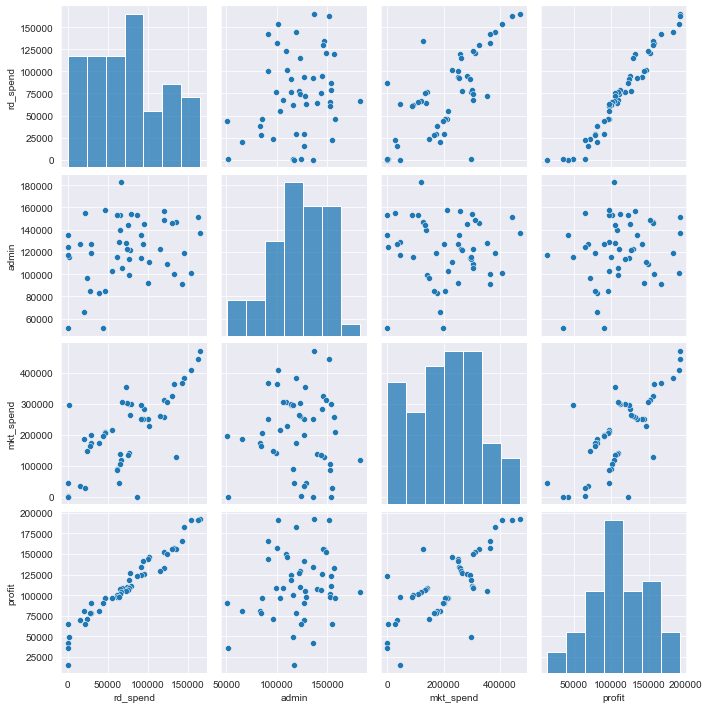

In [6]:
sns.set_style(style='darkgrid')
sns.pairplot(data)

In [7]:
#EDA_report= pp.ProfileReport(data)
#EDA_report.to_file(output_file='report_startups.html') 
# Report reveals no null values 
# There is high correlation between profit and r&d_spend
# There is correlation between r&d_spend and mkt_spend which is not ideal.

# Preparing a model

### Using Statsmodels

In [8]:
#Build model
import statsmodels.formula.api as smf 
model1 = smf.ols('profit~rd_spend+admin+mkt_spend+state',data=data).fit()

In [9]:
model1.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     169.9
Date:                Sat, 29 May 2021   Prob (F-statistic):           1.34e-27
Time:                        16:18:17   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1063.
Df Residuals:                      44   BIC:                             1074.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          5.013e+04   6884.820      7.281      0.000    3.62e+04     6.4e+04
state[T.Florida]    198.7888   3371.007      0.059      0.953   -6595.030    6992.607
state[T.New York]   -41.8870   3256.039     -0.013      0.990   -6604.003    6520.229
rd_spend              0.8060      0.046     17.369      0.000       0.712       0.900
admin                -0.0270      0.052     -0.517      0.608      -0.132       0.078
mkt_spend             0.0270      0.017      1.574      0.123      -0.008       0.062
==============================================================================
Omnibus:                       14.782   Durbin-Watson:                   1.283
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.266
Skew:                          -0.948   Prob(JB):                     2.41e-05
Kurtosis:                       5.572   Cond. No.                     1.45e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.45e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The model summary above reveals that only rd_spend truly is a factor in profit. The remaining variable have p-value greater than 0.05 which means we have to accept the null hypothesis that the factors do not contribute to profit. 

We can a try a model with rd_spend and other variablessee the results.

# Simple Linear Regression models 

We can try a number of SLR models to determine the f-statistics for each variable.


In [10]:
# trying out a new model with rd_spend and profit
model2 = smf.ols('profit~rd_spend',data=data).fit()

In [11]:
model2.summary() 
#rd_spend alone contributes 94.5% variance to profit which is very high and enough to determine the profit. 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 profit   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     849.8
Date:                Sat, 29 May 2021   Prob (F-statistic):           3.50e-32
Time:                        16:18:17   Log-Likelihood:                -527.44
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      48   BIC:                             1063.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.903e+04   2537.897     19.320      0.000    4.39e+04    5.41e+04
rd_spend       0.8543      0.029     29.151      0.000       0.795       0.913
==============================================================================
Omnibus:                       13.727   Durbin-Watson:                   1.116
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               18.536
Skew:                          -0.911   Prob(JB):                     9.44e-05
Kurtosis:                       5.361   Cond. No.                     1.65e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.65e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [12]:
# trying out a new model with mkt_spend and profit
model3 = smf.ols('profit~mkt_spend',data=data).fit()

In [13]:
model3.summary() 
#mkt_spend alone contributes 55% variance to profit which is good. 
#But once mkt_spend is paired with rd_spend, it's contribution decreases due to auto-correlation.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 profit   R-squared:                       0.559
Model:                            OLS   Adj. R-squared:                  0.550
Method:                 Least Squares   F-statistic:                     60.88
Date:                Sat, 29 May 2021   Prob (F-statistic):           4.38e-10
Time:                        16:18:17   Log-Likelihood:                -580.18
No. Observations:                  50   AIC:                             1164.
Df Residuals:                      48   BIC:                             1168.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept       6e+04   7684.530      7.808      0.000    4.46e+04    7.55e+04
mkt_spend      0.2465      0.032      7.803      0.000       0.183       0.310
==============================================================================
Omnibus:                        4.420   Durbin-Watson:                   1.178
Prob(Omnibus):                  0.110   Jarque-Bera (JB):                3.882
Skew:                          -0.336   Prob(JB):                        0.144
Kurtosis:                       4.188   Cond. No.                     4.89e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.89e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Model using mkt_spend and rd_spend

In [14]:
# trying out a new model with admin and profit
model4 = smf.ols('profit~rd_spend+mkt_spend',data=data).fit()
model4.summary()
#Together they contribute about 95% which is good even though there is some minor autocorrelation between the two. 
#I will perform residual analysis and Model deletion diagnostics with model4 and model1 to determine which is better.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 profit   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     450.8
Date:                Sat, 29 May 2021   Prob (F-statistic):           2.16e-31
Time:                        16:18:18   Log-Likelihood:                -525.54
No. Observations:                  50   AIC:                             1057.
Df Residuals:                      47   BIC:                             1063.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.698e+04   2689.933     17.464      0.000    4.16e+04    5.24e+04
rd_spend       0.7966      0.041     19.266      0.000       0.713       0.880
mkt_spend      0.0299      0.016      1.927      0.060      -0.001       0.061
==============================================================================
Omnibus:                       14.677   Durbin-Watson:                   1.257
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.161
Skew:                          -0.939   Prob(JB):                     2.54e-05
Kurtosis:                       5.575   Cond. No.                     5.32e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.32e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Variance Inflation Factor

In [15]:
rsq_rdspend = smf.ols('rd_spend~mkt_spend+admin',data=data).fit().rsquared  
vif_rdspend = 1/(1-rsq_rdspend)

rsq_mktspend = smf.ols('mkt_spend~rd_spend+admin',data=data).fit().rsquared  
vif_mktspend = 1/(1-rsq_mktspend) 

rsq_admin = smf.ols('admin~mkt_spend+rd_spend',data=data).fit().rsquared  
vif_admin = 1/(1-rsq_admin) 

# Storing vif values in a data frame
d1 = {'Variables':['rd_spend','mkt_spend','admin'],'VIF':[vif_rdspend,vif_mktspend,vif_admin]}
Vif_frame = pd.DataFrame(d1)  
Vif_frame

,Variables,VIF
0,rd_spend,2.468903
1,mkt_spend,2.326773
2,admin,1.175091


# Residual Analysis

### Test for Normality of residuals (QQ-Plots) -Model 1

In [16]:
model1.resid.head()

0    -128.741364
1    2720.739894
2    8774.203266
3    9317.013809
4   -6089.193818
dtype: float64

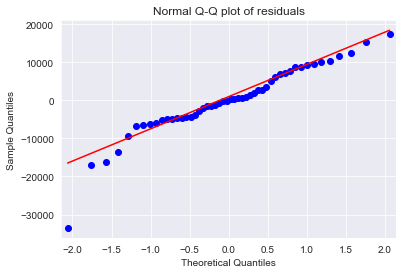

In [17]:
import statsmodels.api as sm
qqplot1=sm.qqplot(model1.resid,line='q') # line = 45 to draw the diagnoal line
plt.title("Normal Q-Q plot of residuals")
plt.show() #It's almost normal except for a few outliers

### Test for Normality of residuals (QQ-Plots) -Model 4

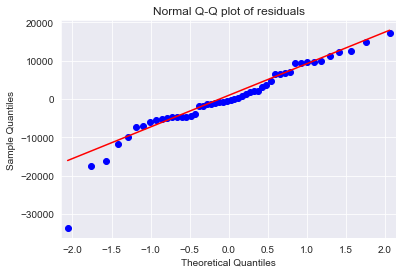

In [18]:
import statsmodels.api as sm
qqplot2=sm.qqplot(model4.resid,line='q') # line = 45 to draw the diagnoal line
plt.title("Normal Q-Q plot of residuals")
plt.show() #It's almost normal except for a few outliers
#QQPlots for model 1 and model 4 are identical

### Residual Plot for Homoscedasticity - Model1

In [19]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

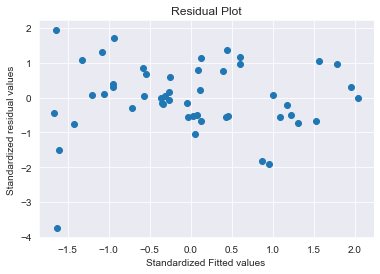

In [20]:
plt.scatter(get_standardized_values(model1.fittedvalues),
            get_standardized_values(model1.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show() # It is almost similarly distributed about the mean 0.
# There is an outlier point at -4.

### Residual Plot for Homoscedasticity - Model4

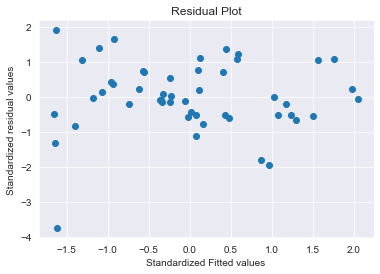

In [21]:
plt.scatter(get_standardized_values(model4.fittedvalues),
            get_standardized_values(model4.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show() # It is almost similarly distributed about the mean 0.
# This distribution is very similar to model1

### Residual vs Regressors - Model1

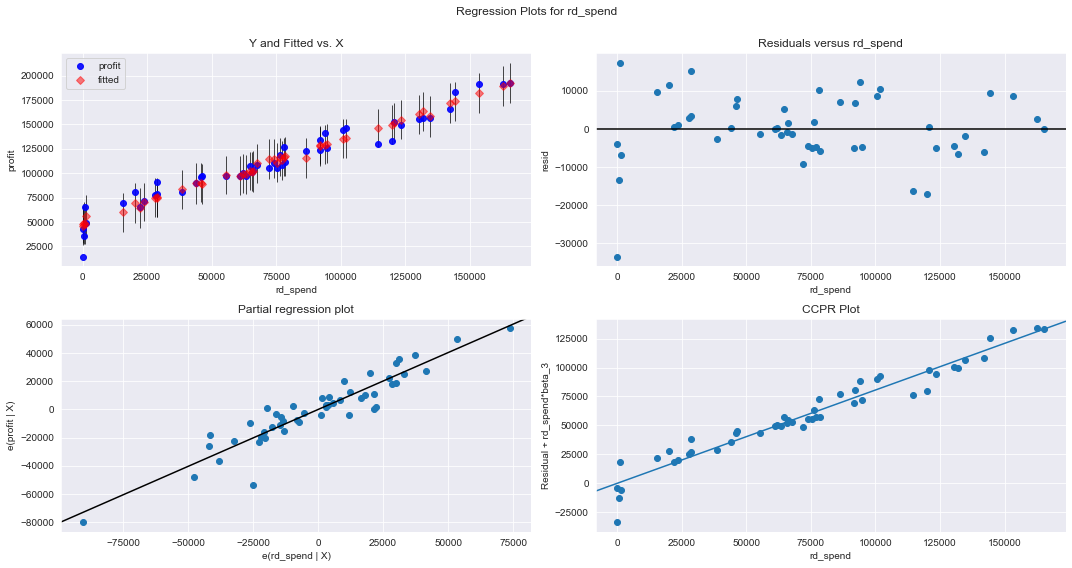

In [22]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model1, "rd_spend", fig=fig)
plt.show()

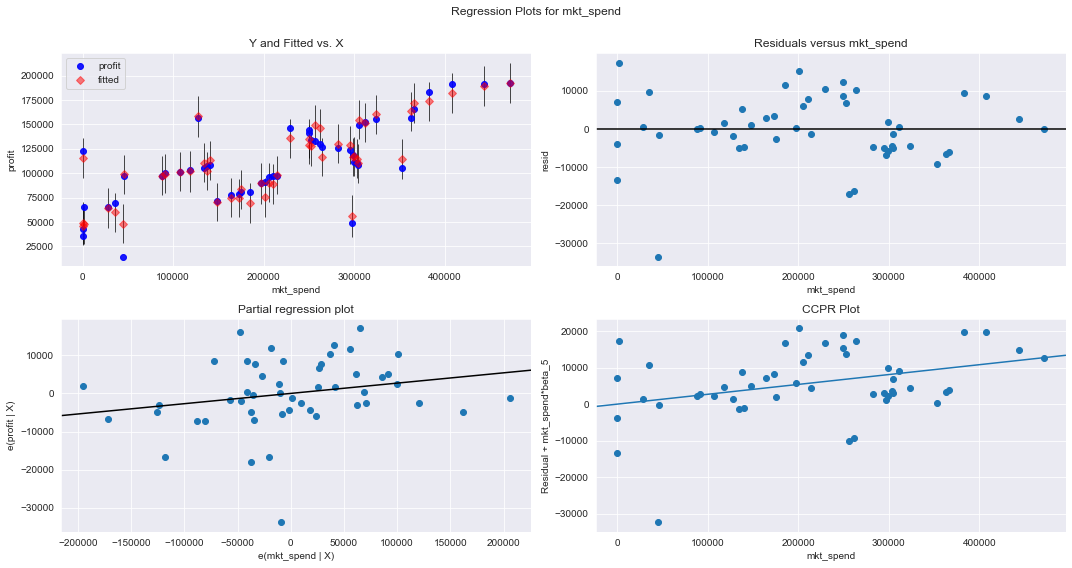

In [23]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model1, "mkt_spend", fig=fig)
plt.show() #Not uniformly distributed. Mkt_spend may not be a good factor

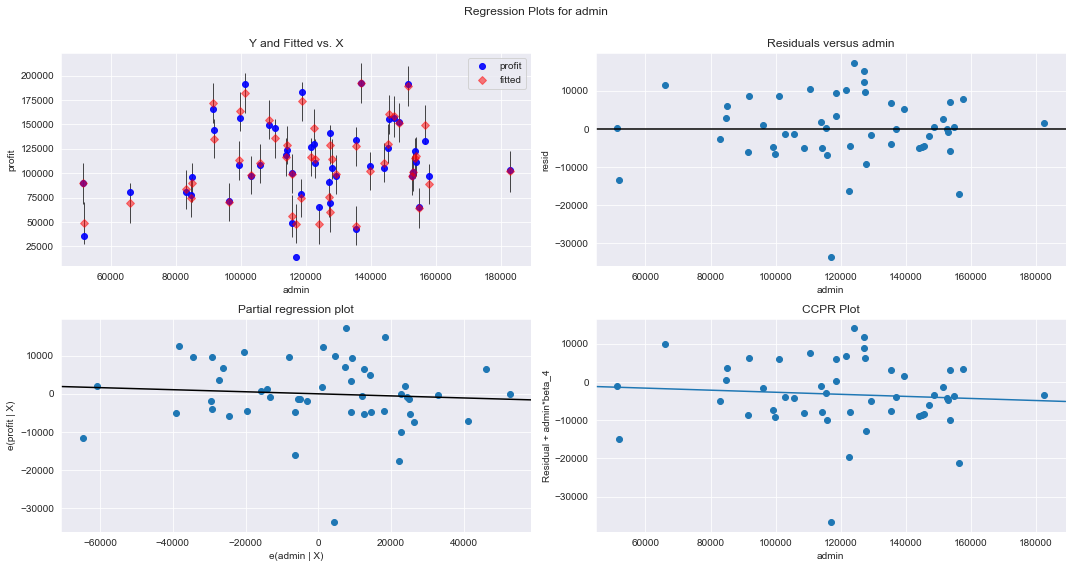

In [24]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model1, "admin", fig=fig)
plt.show() #Not at all uniform

### Residual vs Regressors - Model4

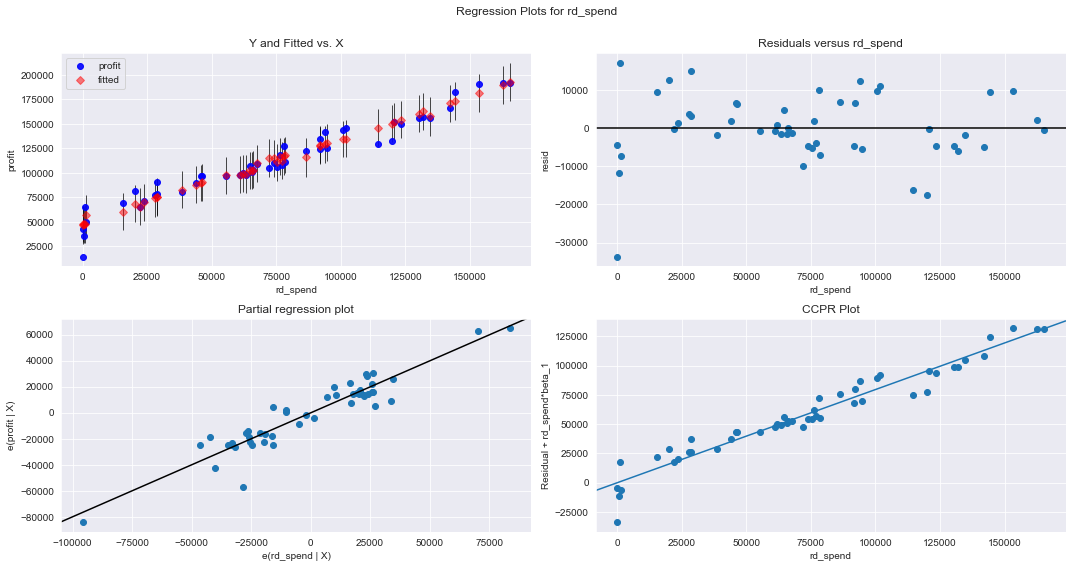

In [25]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model4, "rd_spend", fig=fig)
plt.show()

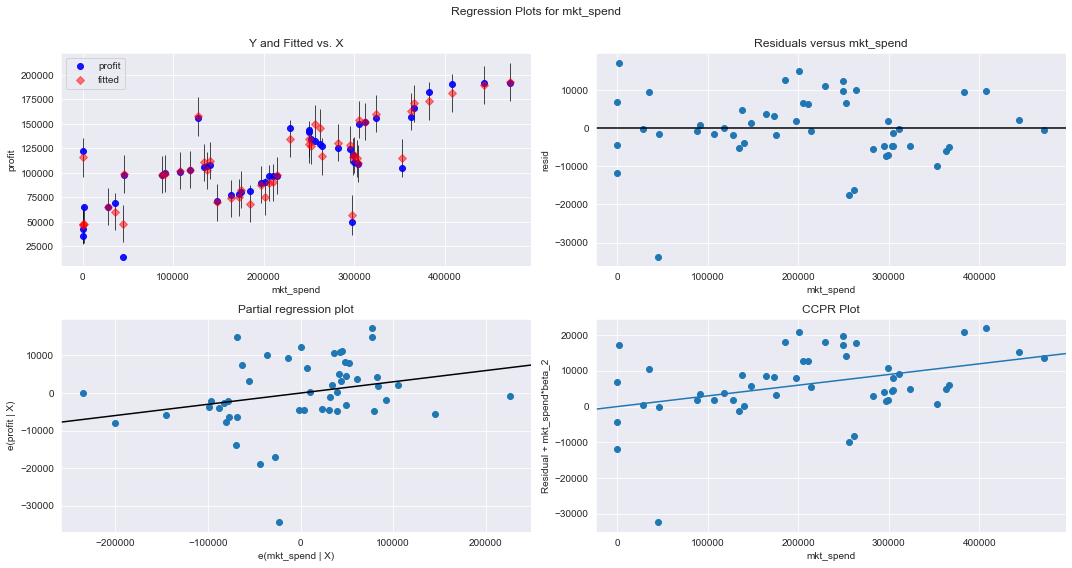

In [26]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model4, "mkt_spend", fig=fig)
plt.show() #Not uniformly distributed. Mkt_spend may not be a good factor

#mkt_spend may need some cleansing

# Model Deletion Diagnostics

### Detecting Influences

### Cook's Distance -Model1

In [27]:
model_influence = model1.get_influence()
(c, _) = model_influence.cooks_distance

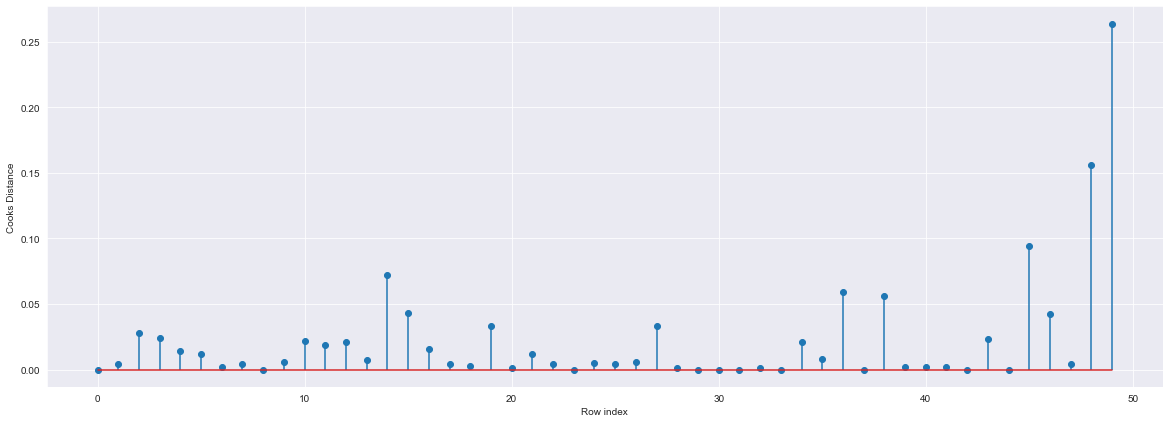

In [28]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(data)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show() #No extreme values

### Cook's Distance -Model4

In [29]:
model_influence = model4.get_influence()
(c, _) = model_influence.cooks_distance

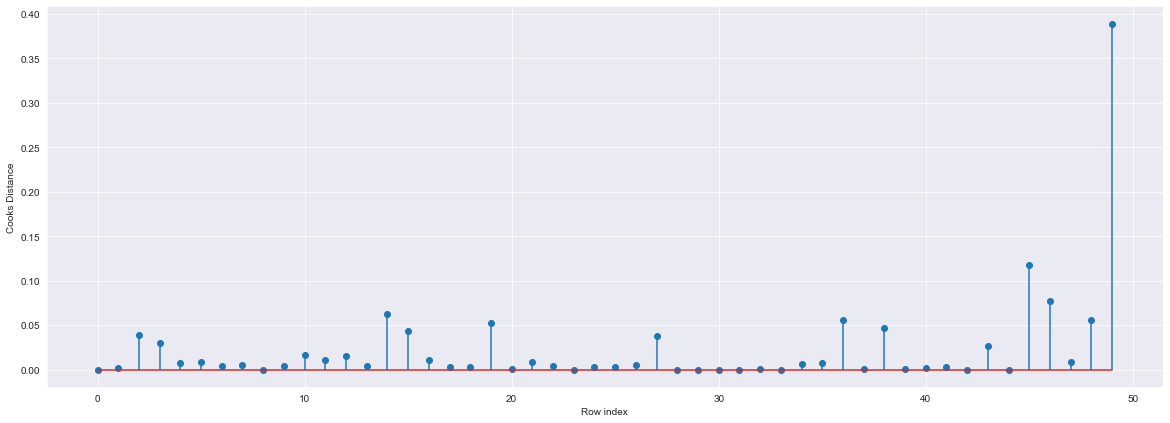

In [30]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(data)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show() #we can remove the arg max value

In [31]:
#index and value of influencer where c is more than 0.35
(np.argmax(c),np.max(c))

(49, 0.38948862279249213)

### High Influence points Model1

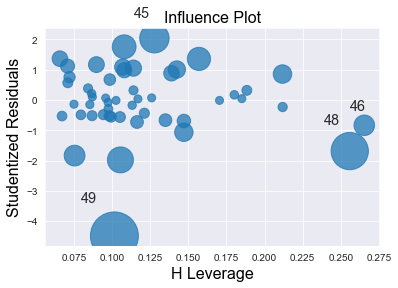

In [32]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model1)
plt.show()

The points 49, 48, and 46 pose a problem and needs to be removed

In [33]:
data[data.index.isin([46, 48,49])]

,rd_spend,admin,mkt_spend,state,profit
46,1315.46,115816.21,297114.46,Florida,49490.75
48,542.05,51743.15,0.00,New York,35673.41
49,0.00,116983.80,45173.06,California,14681.40


### Dropping outliers 

In [34]:
data_new = pd.read_csv("D:\\Education\\ExcelR Assignments\\5\\50_Startups.csv")
data1=data_new.drop(data_new.index[[46,48,49]],axis=0).reset_index()
data1=data1.drop(['index','Administration','State'],axis=1)
data1.rename(columns={'R&D Spend':'rd_spend','Marketing Spend':'mkt_spend','Profit':'profit'  }, inplace = True)
data1.head()

,rd_spend,mkt_spend,profit
0,165349.20,471784.10,192261.83
1,162597.70,443898.53,191792.06
2,153441.51,407934.54,191050.39
3,144372.41,383199.62,182901.99
4,142107.34,366168.42,166187.94


# Building final Model

We will make the final model with cleaned data and model4 variables.

In [35]:
flv_model = smf.ols('profit~rd_spend+mkt_spend',data=data1).fit()
flv_model.summary() #Best values of R-Square. AIC values have come down. Therefore, this would be the best model. 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 profit   R-squared:                       0.960
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                     529.6
Date:                Sat, 29 May 2021   Prob (F-statistic):           1.65e-31
Time:                        16:18:24   Log-Likelihood:                -483.40
No. Observations:                  47   AIC:                             972.8
Df Residuals:                      44   BIC:                             978.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.171e+04   2358.725     21.924      0.000     4.7e+04    5.65e+04
rd_spend       0.7439      0.037     19.902      0.000       0.669       0.819
mkt_spend      0.0323      0.014      2.376      0.022       0.005       0.060
==============================================================================
Omnibus:                        0.086   Durbin-Watson:                   1.660
Prob(Omnibus):                  0.958   Jarque-Bera (JB):                0.292
Skew:                           0.000   Prob(JB):                        0.864
Kurtosis:                       2.614   Cond. No.                     5.76e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.76e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Checking for any Influences in final model

### Cook's distance

In [36]:
model_influence_x = flv_model.get_influence()
(c_V, _) = model_influence_x.cooks_distance

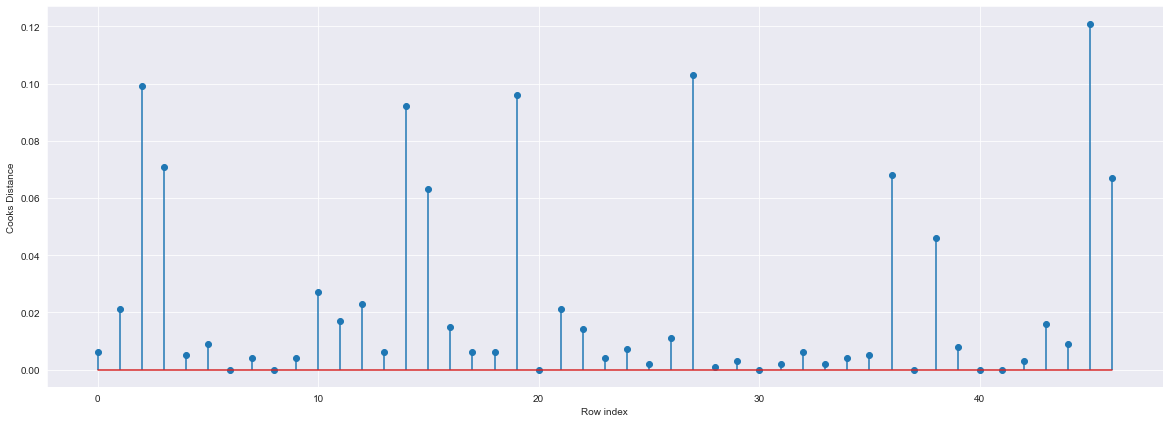

In [37]:
fig= plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(data1)),np.round(c_V,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');

#values are all good. None considerably high values. This is good. 

Since we have perfected our model, we will try predicting new values with our model.

# Predicting new values

In [38]:
#New data for prediction
p_data1=pd.DataFrame({'rd_spend':100000,"mkt_spend":250000},index=[1])
p_data1

,rd_spend,mkt_spend
1,100000,250000


In [39]:
flv_model.predict(p_data1)

1    134173.457814
dtype: float64

In [46]:
flv_model.predict(data1.iloc[0:5,])

0    189947.201324
1    186999.822978
2    179027.346980
3    171482.332145
4    169247.365053
dtype: float64

In [51]:
predicted_values = flv_model.predict(data1)
data1["predicted_profits"] = pd.Series(predicted_values)
data1 #To see how much actual profits vary from predicted profits

,rd_spend,mkt_spend,profit,predicted_profits
0,165349.20,471784.10,192261.83,189947.201324
1,162597.70,443898.53,191792.06,186999.822978
2,153441.51,407934.54,191050.39,179027.346980
3,144372.41,383199.62,182901.99,171482.332145
4,142107.34,366168.42,166187.94,169247.365053
5,131876.90,362861.36,156991.12,161530.559248
6,134615.46,127716.82,156122.51,155972.916982
7,130298.13,323876.68,155752.60,159097.044290
8,120542.52,311613.29,152211.77,151444.171338
9,123334.88,304981.62,149759.96,153307.099523


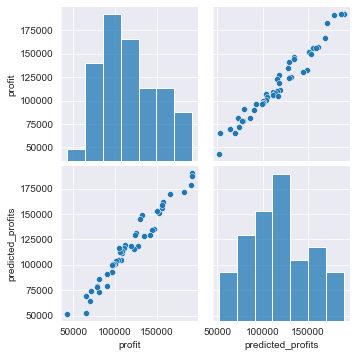

In [52]:
sns.pairplot(data1[['profit','predicted_profits']]) #Almost linear. so Values are predicted almost correctly. 